In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [86]:
df = pd.read_csv('NYSV2FIXED.csv')

/Users/brycecapuano/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (39,151,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14769 entries, 0 to 14768
Columns: 329 entries, _STATE to CHILDREN
dtypes: float64(10), int64(10), object(309)
memory usage: 37.1+ MB
Not asked or Missing    5961
Male                    4408
Female                  4400
Name: CELLSEX, dtype: int64


<AxesSubplot:xlabel='CELLSEX', ylabel='COUNT'>

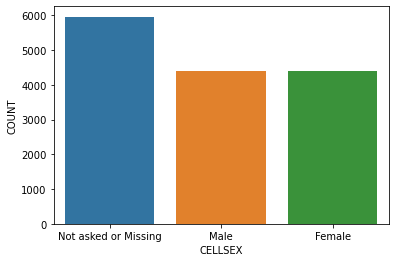

In [87]:
df.dtypes
df.info()
# MY NAME BRYCE
sexes = df['CELLSEX'].value_counts()
print(sexes)
sexesCount = pd.DataFrame({'CELLSEX':sexes.index, 'COUNT':sexes.values})
sns.barplot(data = sexesCount,x = 'CELLSEX', y = 'COUNT')

In [142]:
incomes = pd.DataFrame(columns=['INCOME2'])

for i in df['INCOME2']:
    #if it falls into either of these ranges...add it to the new dataframe
    if i == "$75,000 or more":
        incomes = incomes.append(pd.DataFrame([["75k+"]], columns=['INCOME2']))
    elif i == "Refused":
        incomes = incomes.append(pd.DataFrame([["NA"]], columns=['INCOME2']))
    elif i == "Less than $75,000 ($50,000 to less than $75,000)":
        incomes = incomes.append(pd.DataFrame([["50k-75k"]], columns=['INCOME2']))
    elif i == "Don’t know/Not sure":
        incomes = incomes.append(pd.DataFrame([["NA"]], columns=['INCOME2']))
    elif i == "Less than $35,000 ($25,000 to less than $35,000)":
        incomes = incomes.append(pd.DataFrame([["25k-35k"]], columns=['INCOME2']))
    elif i == "Less than $25,000 ($20,000 to less than $25,000)":
        incomes = incomes.append(pd.DataFrame([["20k-25k"]], columns=['INCOME2']))
    elif i == "Less than $20,000 ($15,000 to less than $20,000)":
        incomes = incomes.append(pd.DataFrame([["15k-20k"]], columns=['INCOME2']))
    elif i == "Less than $15,000 ($10,000 to less than $15,000)":
        incomes = incomes.append(pd.DataFrame([["10k-15k"]], columns=['INCOME2']))
    elif i == "Less than $10,000":
        incomes = incomes.append(pd.DataFrame([["<10k"]], columns=['INCOME2']))
    elif i == "Not asked or Missing":
        incomes = incomes.append(pd.DataFrame([["NA"]], columns=['INCOME2']))
    else: # for invalid entries
        pass

                                             INCOME2  COUNT
0                                    $75,000 or more   4722
1                                            Refused   1890
2   Less than $75,000 ($50,000 to less than $75,000)   1655
3   Less than $50,000 ($35,000 to less than $50,000)   1324
4                                Don’t know/Not sure   1188
5   Less than $35,000 ($25,000 to less than $35,000)    974
6   Less than $25,000 ($20,000 to less than $25,000)    898
7   Less than $20,000 ($15,000 to less than $20,000)    748
8   Less than $15,000 ($10,000 to less than $15,000)    499
9                                  Less than $10,000    455
10                              Not asked or Missing    416


<AxesSubplot:>

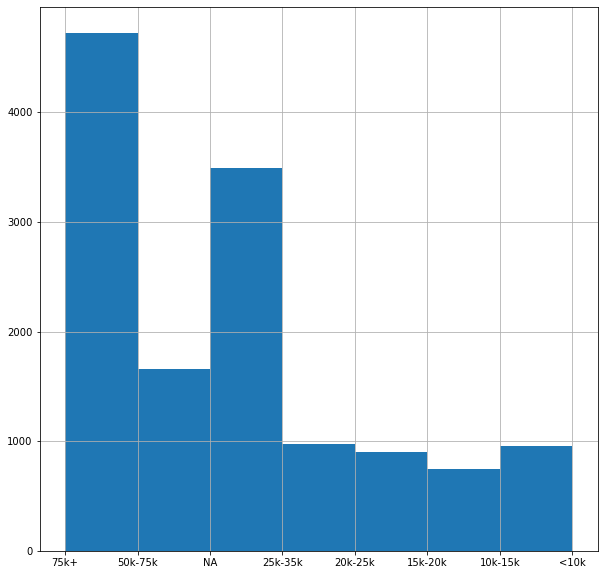

In [141]:
print(incomesCount)
#sns.histplot(data = incomesCount,x = 'INCOME2', y = 'COUNT', palette="pastel")
incomes['INCOME2'].hist(figsize=(10,10), bins=7)